In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
from google.colab.patches import cv2_imshow

# STL to Point Cloud Conversion

In [ ]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np

# Path to your STL file
stl_file_path = "/content/PARTS.STL"

# Load the STL file as a mesh
mesh = o3d.io.read_triangle_mesh(stl_file_path)

# Convert the mesh to a point cloud using Poisson disk sampling
point_cloud = mesh.sample_points_poisson_disk(number_of_points=10000)


In [ ]:
point_cloud.points

std::vector<Eigen::Vector3d> with 10000 elements.
Use numpy.asarray() to access data.

In [ ]:
o3d.visualization.draw_plotly([point_cloud])

In [ ]:
import numpy as np
import plotly.graph_objects as go

print("Load a ply point cloud, print it, and render it")
pcd = point_cloud
points = np.asarray(pcd.points)
print(pcd)
print(np.asarray(pcd.points))

colors = None
if pcd.has_colors():
    colors = np.asarray(pcd.colors)
elif pcd.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(pcd.normals) * 0.5

fig = go.Figure(
  data=[
    go.Scatter3d(
      x=points[:,0], y=points[:,1], z=points[:,2],
      mode='markers',
      marker=dict(size=1, color=colors)
)
],
#   layout=dict(
#     scene=dict(
#       # xaxis=dict(visible=False),
#       # yaxis=dict(visible=False),
#       # zaxis=dict(visible=False)
# )
# )
)
fig.show()

Load a ply point cloud, print it, and render it
PointCloud with 10000 points.
[[ 0.         20.27975069 47.38146869]
 [ 0.          7.98357001 49.94137409]
 [ 0.          2.63576191 55.1718201 ]
 ...
 [59.14876975 34.72775304 28.94259743]
 [58.62243059 33.7443258  28.12900655]
 [57.82490208 31.46664027 27.57178693]]


In [ ]:
np.asarray(point_cloud.points)


array([[ 0.        ,  1.40225698, 33.22972355],
       [ 0.        , 16.56548191, 63.34686555],
       [ 0.        , 14.00338878, 40.73882362],
       ...,
       [59.36668767, 35.30261796, 28.72624666],
       [57.77509558, 31.29705987, 27.53409028],
       [57.13801353, 28.68223147, 26.59075675]])

# 2D Object Detection

Method_1: SSD

In [ ]:
import torch

In [ ]:
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model=torchvision.models.detection.ssd300_vgg16(pretrained=True)

In [ ]:
model.eval()

In [ ]:
ig = Image.open("/content/imag1.png")

In [ ]:
transform = T.ToTensor()
img=transform(ig)

In [ ]:
with torch.no_grad():
  pred=model([img])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bboxes, scores, labels=pred[0]["boxes"], pred[0]["scores"], pred[0]["labels"]

In [ ]:
num=torch.argwhere(scores>0.5).shape[0]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
igg=cv2.imread("/content/imag1.png")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  igg=cv2.rectangle(igg, (x1,y1), (x2,y2),  (0,255,0), 1)
  class_name=coco_names[labels.numpy()[i] -1]
  igg=cv2.putText(igg,class_name, (x1,y1-10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

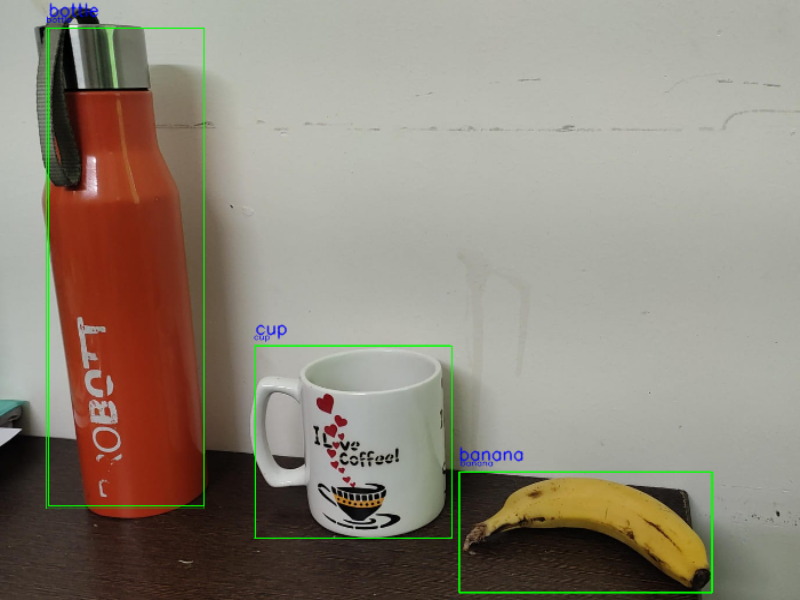

In [ ]:
rescaled_imgg = cv2.resize(igg, (800, 600))
cv2_imshow(rescaled_imgg)

Method_2:  Convex Hull Points

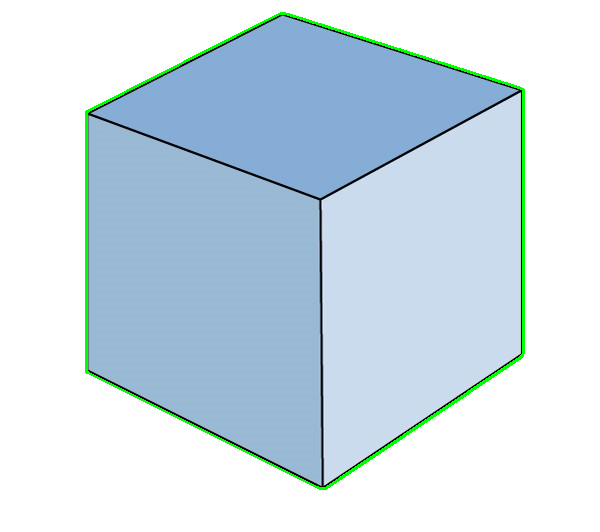

Convex Hull Points:
[[284  13]
 [288  14]
 [307  20]
 [386  45]
 [512  85]
 [521  88]
 [523  89]
 [523 353]
 [522 355]
 [520 357]
 [468 392]
 [340 478]
 [325 488]
 [320 488]
 [317 487]
 [ 87 372]
 [ 86 371]
 [ 86 112]
 [ 87 111]
 [124  92]
 [238  34]
 [280  13]]


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Cube.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour as the object contour
object_contour = max(contours, key=cv2.contourArea)

# Compute the convex hull of the object contour
hull = cv2.convexHull(object_contour)

# Draw the convex hull on the original image
cv2.drawContours(image, [hull], -1, (0, 255, 0), 2)

# Display the original image with the convex hull
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Get the coordinates of the convex hull points
convex_hull_points = hull[:, 0, :]

# Print the coordinates of the convex hull points
print("Convex Hull Points:")
print(convex_hull_points)


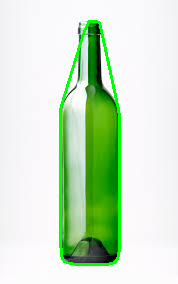

Convex Hull Points:
[[119 247]
 [118 256]
 [117 258]
 [115 261]
 [114 262]
 [111 263]
 [106 264]
 [ 76 264]
 [ 70 263]
 [ 66 262]
 [ 64 261]
 [ 62 258]
 [ 61 255]
 [ 60 240]
 [ 60 109]
 [ 61 105]
 [ 83  33]
 [ 88  22]
 [ 89  21]
 [ 96  21]
 [ 99  22]
 [100  26]
 [118 109]
 [119 116]]


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Glass_Bottle2.jfif')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour as the object contour
object_contour = max(contours, key=cv2.contourArea)

# Compute the convex hull of the object contour
hull = cv2.convexHull(object_contour)

# Draw the convex hull on the original image
cv2.drawContours(image, [hull], -1, (0, 255, 0), 2)

# Display the original image with the convex hull
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Get the coordinates of the convex hull points
convex_hull_points = hull[:, 0, :]

# Print the coordinates of the convex hull points
print("Convex Hull Points:")
print(convex_hull_points)


# 3D Object Detection

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Path to your STL file
stl_file_path = "/content/PARTS.STL"

# Load the STL file as a mesh
mesh = o3d.io.read_triangle_mesh(stl_file_path)

# Convert the mesh to a point cloud using Poisson disk sampling
pcd = mesh.sample_points_poisson_disk(number_of_points=10000)

points = np.asarray(pcd.points)
print(pcd)
print(np.asarray(pcd.points))

colors = None
if pcd.has_colors():
    colors = np.asarray(pcd.colors)
elif pcd.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(pcd.normals) * 0.5

# Create a scatter plot of the points
fig = go.Figure(data=[go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=2, color=colors)
)])

# Calculate bounding box (min/max for each axis)
min_bound = np.min(points, axis=0)
max_bound = np.max(points, axis=0)

# Vertices of the bounding box
vertices = np.array([
    [min_bound[0], min_bound[1], min_bound[2]],
    [max_bound[0], min_bound[1], min_bound[2]],
    [max_bound[0], max_bound[1], min_bound[2]],
    [min_bound[0], max_bound[1], min_bound[2]],
    [min_bound[0], min_bound[1], max_bound[2]],
    [max_bound[0], min_bound[1], max_bound[2]],
    [max_bound[0], max_bound[1], max_bound[2]],
    [min_bound[0], max_bound[1], max_bound[2]],
])

# List of edges for the bounding box
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # bottom
    [4, 5], [5, 6], [6, 7], [7, 4],  # top
    [0, 4], [1, 5], [2, 6], [3, 7]   # sides
]

# Add lines for edges with red color and increased thickness
for s, e in edges:
    fig.add_trace(go.Scatter3d(
        x=vertices[[s, e], 0],
        y=vertices[[s, e], 1],
        z=vertices[[s, e], 2],
        mode='lines',
        line=dict(color='red', width=4)  # Changed color to red and increased thickness to 4
    ))

# Update plot appearance
fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=False, visible=False),
        yaxis=dict(showbackground=False, visible=False),
        zaxis=dict(showbackground=False, visible=False),
        aspectmode='auto'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()


PointCloud with 10000 points.
[[ 0.         27.59613915 52.48962696]
 [ 0.          3.06109251 51.80443393]
 [ 0.         19.70389307 58.373939  ]
 ...
 [61.12090646 37.87288593 30.48114992]
 [60.14795693 36.56084925 29.54621799]
 [59.2316339  34.99018052 28.74637263]]


In [ ]:
import open3d as o3d
import numpy as np
from scipy.spatial import ConvexHull

# Load the point cloud data from a PCD file
# pcd_path = '/path/to/your.pcd'  # Replace with the actual path to your PCD file
# pcd = o3d.io.read_point_cloud(pcd_path)
# points = np.asarray(point_cloud)

# Compute the convex hull of the point cloud
hull = ConvexHull(points)

# Get the indices of the vertices forming the convex hull
hull_vertices_indices = hull.vertices

# Extract the vertices of the convex hull
hull_vertices = points[hull_vertices_indices]

# Compute the minimum and maximum coordinates along each axis to define the bounding box
min_coords = np.min(hull_vertices, axis=0)
max_coords = np.max(hull_vertices, axis=0)

# Compute the center and size of the bounding box
center = (min_coords + max_coords) / 2
size = max_coords - min_coords

print("Bounding Box Center:", center)
print("Bounding Box Size:", size)


Bounding Box Center: [53.40271891 25.56716377 37.51318409]
Bounding Box Size: [106.80543782  51.05220352  74.97363183]


In [ ]:
import open3d as o3d
import numpy as np
from scipy.spatial import ConvexHull
import plotly.graph_objects as go

# Load the STL file
stl_path = '/content/SPHERE.STL'
mesh = o3d.io.read_triangle_mesh(stl_path)
mesh.compute_vertex_normals()

# Convert mesh to point cloud
pcd = mesh.sample_points_poisson_disk(number_of_points=10000)
points = np.asarray(pcd.points)

# Compute the convex hull of the point cloud
hull = ConvexHull(points)

# Get the indices of the vertices forming the convex hull
hull_vertices_indices = hull.vertices

# Extract the vertices of the convex hull
hull_vertices = points[hull_vertices_indices]

# Compute the minimum and maximum coordinates along each axis to define the bounding box
min_coords = np.min(hull_vertices, axis=0)
max_coords = np.max(hull_vertices, axis=0)

# Compute the center and size of the bounding box
center = (min_coords + max_coords) / 2
size = max_coords - min_coords

print("Bounding Box Center:", center)
print("Bounding Box Size:", size)

# Display the point cloud and the bounding box using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=2, color='blue')
)])

# Vertices of the bounding box
vertices = np.array([
    [min_coords[0], min_coords[1], min_coords[2]],
    [max_coords[0], min_coords[1], min_coords[2]],
    [max_coords[0], max_coords[1], min_coords[2]],
    [min_coords[0], max_coords[1], min_coords[2]],
    [min_coords[0], min_coords[1], max_coords[2]],
    [max_coords[0], min_coords[1], max_coords[2]],
    [max_coords[0], max_coords[1], max_coords[2]],
    [min_coords[0], max_coords[1], max_coords[2]],
])

# List of edges for the bounding box
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # bottom
    [4, 5], [5, 6], [6, 7], [7, 4],  # top
    [0, 4], [1, 5], [2, 6], [3, 7]   # sides
]

# Add lines for edges of the bounding box
for s, e in edges:
    fig.add_trace(go.Scatter3d(
        x=vertices[[s, e], 0],
        y=vertices[[s, e], 1],
        z=vertices[[s, e], 2],
        mode='lines',
        line=dict(color='red', width=2)
    ))

# # Update plot appearance
# fig.update_layout(
#     scene=dict(
#         xaxis=dict(showbackground=False),
#         yaxis=dict(showbackground=False),
#         zaxis=dict(showbackground=False),
#         aspectmode='auto'
#     ),
#     margin=dict(l=0, r=0, b=0, t=0)
# )

# Show the plot
fig.show()


Bounding Box Center: [24.99885022 25.00858035 25.00238712]
Bounding Box Size: [49.96054468 49.93503295 49.93972819]


# Grasping Points

Method_1: Aspect Ratio

In [ ]:
def predict_grasp_orientation(bounding_box):

  if  bounding_box[2] > bounding_box[3]:
    aspect_ratio = bounding_box[2] / bounding_box[3]
  else:
    aspect_ratio = bounding_box[3] / bounding_box[2]



  if aspect_ratio >= 0.2 and aspect_ratio <= 1.05:
    return "center"  # Likely frontal view, center grasp
  elif aspect_ratio > 1.05:
    return "side"  # Likely side view, side grasp
  else:
    return "unknown"  # Unclear orientation

In [ ]:
grasp_orientations = []
class_names = []

igg=cv2.imread("/content/imag1.png")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  igg=cv2.rectangle(igg, (x1,y1), (x2,y2),  (0,255,0), 1)
  class_name=coco_names[labels.numpy()[i] -1]
  grasp_orientations.append(predict_grasp_orientation([x1, y1, x2, y2]))
  igg=cv2.putText(igg,class_name, (x1,y1-10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
  cv2.putText(igg, grasp_orientations[i], (x1, y1+10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

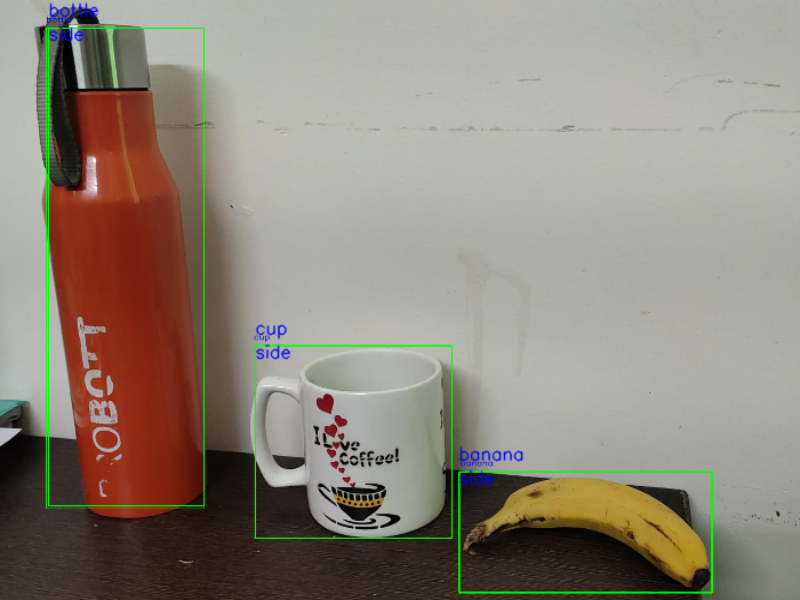

In [ ]:
rescaled_imgg = cv2.resize(igg, (800, 600))
cv2_imshow(rescaled_imgg)

Method_2: Distance Transform

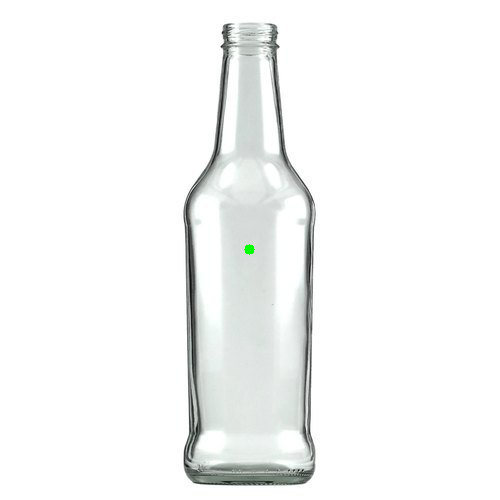

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Glass_Bottle.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection and dilation (optional)
edges = cv2.Canny(gray, 50, 150)
dilated_edges = cv2.dilate(edges, None, iterations=5)

# Compute the distance transform
dist_transform = cv2.distanceTransform(dilated_edges, cv2.DIST_L2, 5)

# Invert the distance transform to highlight distant points
max_value = np.amax(dist_transform)
dist_transform_inverse = max_value - dist_transform

# Threshold the inverted distance transform to find grasping points
threshold_value = 0.8 * max_value  # Adjust threshold as needed
_, grasping_mask = cv2.threshold(dist_transform_inverse, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the grasping mask
contours, _ = cv2.findContours(grasping_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw grasping points on the original image
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

# Display the original image with grasping points
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


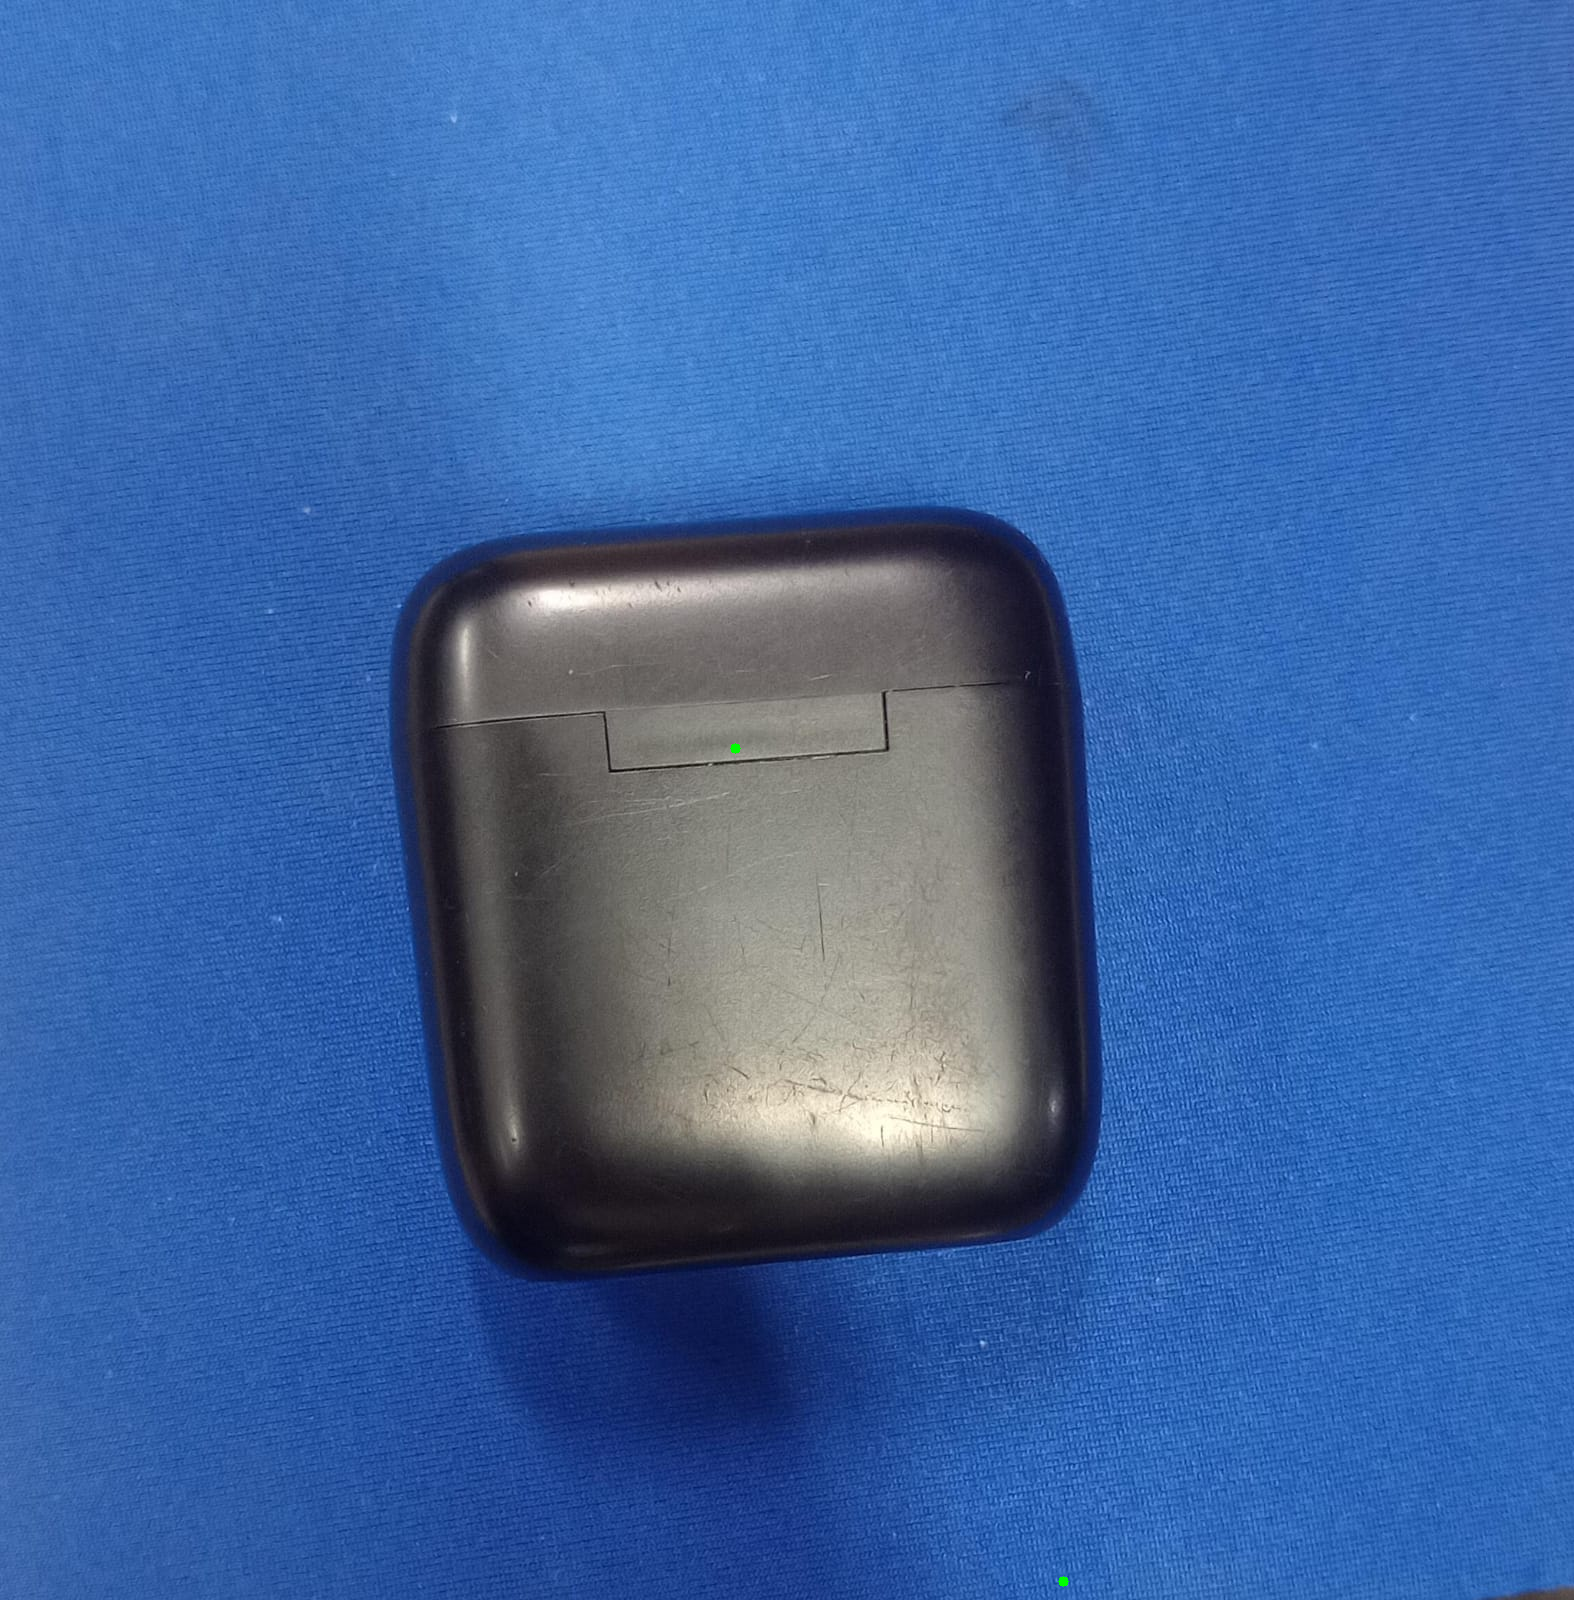

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Earpodes.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection and dilation (optional)
edges = cv2.Canny(gray, 50, 150)
dilated_edges = cv2.dilate(edges, None, iterations=5)

# Compute the distance transform
dist_transform = cv2.distanceTransform(dilated_edges, cv2.DIST_L2, 5)

# Invert the distance transform to highlight distant points
max_value = np.amax(dist_transform)
dist_transform_inverse = max_value - dist_transform

# Threshold the inverted distance transform to find grasping points
threshold_value = 0.8 * max_value  # Adjust threshold as needed
_, grasping_mask = cv2.threshold(dist_transform_inverse, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the grasping mask
contours, _ = cv2.findContours(grasping_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw grasping points on the original image
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

# Display the original image with grasping points
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
def compute_grasping_points(point_cloud):
    # Estimate normals for the point cloud
    point_cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

    # Downsample the point cloud
    downsampled_cloud = point_cloud.voxel_down_sample(voxel_size=0.01)

    # Calculate the centroid and main axis of the point cloud
    points = np.asarray(downsampled_cloud.points)
    centroid = np.mean(points, axis=0)
    _, _, eigenvectors = np.linalg.svd(points - centroid, full_matrices=True)
    main_axis = eigenvectors[:, 0]

    # Find the cutting plane perpendicular to the main axis
    cutting_plane = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=centroid).rotate(
        o3d.geometry.get_rotation_matrix_from_xyz((main_axis * np.pi / 2)), centroid)

    # Extract points near the cutting plane
    cutting_indices = np.where(np.abs(points[:, 2] - centroid[2]) < 0.1)[0]
    cutting_points = downsampled_cloud.select_by_index(cutting_indices)

    # Find the initial grasping points
    initial_points = np.asarray(cutting_points.points)
    p1 = initial_points[np.argmax(initial_points[:, 2])]
    p2 = initial_points[np.argmin(initial_points[:, 2])]

    # Define grasping areas as spheres around the initial points
    finger_tip_width = 0.02
    sphere_points_1 = o3d.geometry.TriangleMesh.create_sphere(radius=finger_tip_width).sample_points_poisson_disk(number_of_points=1000)
    sphere_points_2 = o3d.geometry.TriangleMesh.create_sphere(radius=finger_tip_width).sample_points_poisson_disk(number_of_points=1000)

    grasping_area_1 = o3d.geometry.PointCloud()
    grasping_area_1.points = o3d.utility.Vector3dVector(np.asarray(sphere_points_1.points) + p1)

    grasping_area_2 = o3d.geometry.PointCloud()
    grasping_area_2.points = o3d.utility.Vector3dVector(np.asarray(sphere_points_2.points) + p2)

    # Rank and select the best grasping points
    best_points = rank_grasping_points(grasping_area_1, grasping_area_2, centroid, main_axis, finger_tip_width)

    return best_points


In [ ]:
def visualize_grasping_points(point_cloud, grasping_points):
    # Convert Open3D PointCloud to numpy array
    points = np.asarray(point_cloud.points)

    # Create a line set to visualize the grasping points
    lines = [[grasping_points[0], grasping_points[1]]]
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(points)
    line_set.lines = o3d.utility.Vector2iVector(np.arange(len(lines) * 2).reshape(-1, 2))

    # Visualize
    o3d.visualization.draw_plotly([point_cloud, line_set])

In [ ]:
visualize_grasping_points(point_cloud, grasping_points)

In [ ]:
grasping_points = compute_grasping_points(point_cloud)

In [ ]:
def rank_grasping_points(area_1, area_2, centroid, main_axis, finger_tip_width):
    grasp_configurations = []

    # Voxelize the grasping areas
    voxel_area_1 = area_1.voxel_down_sample(voxel_size=finger_tip_width * 0.5)
    voxel_area_2 = area_2.voxel_down_sample(voxel_size=finger_tip_width * 0.5)

    # Calculate the cutting plane
    cutting_plane_normal = main_axis
    cutting_plane_offset = np.dot(centroid, cutting_plane_normal)

    for point1 in voxel_area_1.points:
        for point2 in voxel_area_2.points:
            # Calculate the ranking score
            distance_score = distance_to_cutting_plane(point1, point2, cutting_plane_normal, cutting_plane_offset)
            curvature_score = curvature_score_function(point1, point2, area_1, area_2)
            antipodal_score = antipodal_score_function(point1, point2, area_1, area_2)
            perpendicular_score = perpendicular_score_function(point1, point2, main_axis)

            total_score = 1.5 * distance_score + curvature_score + antipodal_score + perpendicular_score

            grasp_configurations.append(GraspConfiguration(point1, point2, total_score))

    # Sort the grasp configurations by score and select the best one
    best_grasp = max(grasp_configurations, key=lambda x: x.score)

    return best_grasp.point1, best_grasp.point2


In [ ]:
def curvature_score_function(point1, point2, area_1, area_2):
    # Estimate the curvature at point1
    point1_neighbors = o3d.geometry.PointCloud()
    point1_neighbors.points = o3d.utility.Vector3dVector(np.asarray(area_1.points))
    search_tree = o3d.geometry.KDTreeFlann(point1_neighbors)
    [_, idx, _] = search_tree.search_radius_vector_3d(point1, radius=0.02)
    neighbors = np.asarray(point1_neighbors.points)[idx[1:], :]  # Exclude the point itself

    # Calculate the covariance matrix of the neighbors
    covariance = np.cov(neighbors.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    sorted_eigenvalues = np.sort(eigenvalues)
    curvature1 = sorted_eigenvalues[0] / (sorted_eigenvalues[0] + sorted_eigenvalues[1] + sorted_eigenvalues[2])

    # Estimate the curvature at point2
    point2_neighbors = o3d.geometry.PointCloud()
    point2_neighbors.points = o3d.utility.Vector3dVector(np.asarray(area_2.points))
    search_tree = o3d.geometry.KDTreeFlann(point2_neighbors)
    [_, idx, _] = search_tree.search_radius_vector_3d(point2, radius=0.02)
    neighbors = np.asarray(point2_neighbors.points)[idx[1:], :]  # Exclude the point itself

    # Calculate the covariance matrix of the neighbors
    covariance = np.cov(neighbors.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    sorted_eigenvalues = np.sort(eigenvalues)
    curvature2 = sorted_eigenvalues[0] / (sorted_eigenvalues[0] + sorted_eigenvalues[1] + sorted_eigenvalues[2])

    # Scale the curvature values between 0 and 1
    curvature1 = 1.0 - curvature1
    curvature2 = 1.0 - curvature2

    return curvature1 + curvature2

In [ ]:
def antipodal_score_function(point1, point2, area_1, area_2):
    # Calculate the normal vectors at point1 and point2
    point1_neighbors = o3d.geometry.PointCloud()
    point1_neighbors.points = o3d.utility.Vector3dVector(np.asarray(area_1.points))
    point1_neighbors.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.02, max_nn=30))
    normal1 = point1_neighbors.normals[0]

    point2_neighbors = o3d.geometry.PointCloud()
    point2_neighbors.points = o3d.utility.Vector3dVector(np.asarray(area_2.points))
    point2_neighbors.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.02, max_nn=30))
    normal2 = point2_neighbors.normals[0]

    # Calculate the grasp direction
    grasp_direction = point2 - point1
    grasp_direction /= np.linalg.norm(grasp_direction)

    # Calculate the antipodal score based on the angle between the normals and the grasp direction
    angle1 = np.arccos(np.dot(normal1, grasp_direction))
    angle2 = np.arccos(np.dot(-normal2, grasp_direction))
    antipodal_score = np.cos(angle1) + np.cos(angle2) - np.abs(np.cos(angle1) - np.cos(angle2))

    return antipodal_score

def perpendicular_score_function(point1, point2, main_axis):
    grasp_direction = point2 - point1
    grasp_direction /= np.linalg.norm(grasp_direction)
    perpendicular_score = np.abs(np.dot(grasp_direction, main_axis))
    return perpendicular_score